In [47]:
from moralis import evm_api
import numpy as np
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import datetime
import time

In [48]:
api_key = "1CUCIPoigQjlSXrGypvDO69283uwb0AFglMt86ySzozdiLHdd9uwyjpV3JA6BTDb"

cursor = ''
df = pd.DataFrame()

for x in range(2):

    result = evm_api.nft.get_nft_contract_transfers(
        api_key=api_key,
        params={
            "address": "0xb47e3cd837dDF8e4c57F05d70Ab865de6e193BBB", 
            "chain": "eth",
            "cursor": cursor
        }
    )

    cursor = result["cursor"]
    df2 = json_normalize(result['result'])

    if df.empty:
      df = df2
    else:
      df = pd.concat([df, df2])
    
    time.sleep(1.1)

df

,block_number,block_timestamp,block_hash,transaction_hash,transaction_index,log_index,value,contract_type,transaction_type,token_address,token_id,from_address,to_address,amount,verified,operator
0,16052744,2022-11-26T07:43:11.000Z,0xfac3a5a2326602ccb77340d6b47a916ca4fac70cad66...,0x1445226e195af6da994d75a1d58530366d2274fd3259...,74,126,26221699944465809078,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,4113,0xed01f8a737813f0bda2d4340d191dbf8c2cbcf30,0xacdaeeb57ff6886fc8e203b9dd4c2b241df89b7a,1,1,None
1,16052744,2022-11-26T07:43:11.000Z,0xfac3a5a2326602ccb77340d6b47a916ca4fac70cad66...,0x1445226e195af6da994d75a1d58530366d2274fd3259...,74,124,26221699944465809078,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,4113,0xb7f7f6c52f2e2fdb1963eab30438024864c313f6,0xed01f8a737813f0bda2d4340d191dbf8c2cbcf30,1,1,None
2,16052541,2022-11-26T07:02:35.000Z,0x01fc9ecf6f0582ad0b9e9becec4cbcc1c1048f1460a5...,0x5590ebe1ab3b8d72397835bd14449c3b31158e2fa65b...,29,72,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,4113,0xc385e90da38f8798f5a5512d415a13c87e0d6265,0xb7f7f6c52f2e2fdb1963eab30438024864c313f6,1,1,None
3,16052541,2022-11-26T07:02:35.000Z,0x01fc9ecf6f0582ad0b9e9becec4cbcc1c1048f1460a5...,0x5590ebe1ab3b8d72397835bd14449c3b31158e2fa65b...,29,70,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,4113,0xed01f8a737813f0bda2d4340d191dbf8c2cbcf30,0xc385e90da38f8798f5a5512d415a13c87e0d6265,1,1,None
4,16052541,2022-11-26T07:02:35.000Z,0x01fc9ecf6f0582ad0b9e9becec4cbcc1c1048f1460a5...,0x5590ebe1ab3b8d72397835bd14449c3b31158e2fa65b...,29,68,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,4113,0xacdaeeb57ff6886fc8e203b9dd4c2b241df89b7a,0xed01f8a737813f0bda2d4340d191dbf8c2cbcf30,1,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15976954,2022-11-15T17:34:35.000Z,0xef30f9568a42dd7e8e269a67a528c73ec35d011fa2e1...,0xbb9643ca731f20d726e928b58bdaa47e78019c68677c...,134,293,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,5416,0x26206caca89d7047dad7e3a15f18f0614a4b82d2,0x36e4467c85d55dda7454f7b71439a1e96f4fa5d0,1,1,None
96,15976941,2022-11-15T17:31:59.000Z,0x3f9154cd04577ba414a8aaa34c3cf7df153e2533359f...,0x7904d8bad941636b51e69744f61a9750085bee40e337...,73,97,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,3313,0x26206caca89d7047dad7e3a15f18f0614a4b82d2,0x36e4467c85d55dda7454f7b71439a1e96f4fa5d0,1,1,None
97,15976836,2022-11-15T17:09:59.000Z,0xefa57970b9beaaccf5486fa8f589aab8b1df70f0c4f8...,0xa94957afa8505b4bce6233a064bd3e82218dff0a15dc...,125,189,69490000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,4081,0xf207e69a7cc3b4a00fec3039891a77b3df8c3577,0x3042887f97821ec36be64d2677efd2e943a4cb0f,1,1,None
98,15976360,2022-11-15T15:34:11.000Z,0xe08b44b816991e495ad0536d551de347dcdec48e2de8...,0x3c0daec214b0655822887569de498c2963ea1065af54...,70,130,66500000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,1043,0xb932e9dd1b48ce5895a3511d8be0169fb0e41323,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,1,1,None


In [49]:
pd.options.mode.chained_assignment = None  # default='warn'

df = df[df['value'] != '0']

df['Date'] = df.apply(lambda row: datetime.datetime.strptime(row.block_timestamp[0:10],'%Y-%m-%d').strftime('%b %d'), axis=1)

df

,block_number,block_timestamp,block_hash,transaction_hash,transaction_index,log_index,value,contract_type,transaction_type,token_address,token_id,from_address,to_address,amount,verified,operator,Date
0,16052744,2022-11-26T07:43:11.000Z,0xfac3a5a2326602ccb77340d6b47a916ca4fac70cad66...,0x1445226e195af6da994d75a1d58530366d2274fd3259...,74,126,26221699944465809078,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,4113,0xed01f8a737813f0bda2d4340d191dbf8c2cbcf30,0xacdaeeb57ff6886fc8e203b9dd4c2b241df89b7a,1,1,None,Nov 26
1,16052744,2022-11-26T07:43:11.000Z,0xfac3a5a2326602ccb77340d6b47a916ca4fac70cad66...,0x1445226e195af6da994d75a1d58530366d2274fd3259...,74,124,26221699944465809078,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,4113,0xb7f7f6c52f2e2fdb1963eab30438024864c313f6,0xed01f8a737813f0bda2d4340d191dbf8c2cbcf30,1,1,None,Nov 26
5,16051843,2022-11-26T04:42:11.000Z,0xdd9ee7fa4968239c631b402d22258553d005cce2583c...,0x225284b97d19f07059af3bdc00e9c70eefab0e11de45...,47,204,67480000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,9519,0x60e23da7a0b229902da892ddd6a839382eab04ca,0x8635100eb98cd358f2f73d7526419f743d2f53c3,1,1,None,Nov 26
11,16049490,2022-11-25T20:49:47.000Z,0x064af93886ec5f2b6c39e5881cb7a00a9eec1fcaebbf...,0x5327f60e3252d7aef46169593324bef780e3ef50b406...,45,167,66000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,3359,0x384bfb892fee00d3b4f72550d8ac4c38224864f8,0x9fc4001133d3825b7ce4b05bcfbe227fb3cd5fdf,1,1,None,Nov 25
12,16048981,2022-11-25T19:07:47.000Z,0x62d466b780d511ba361c8cb6a5727eb1e9f245963ec2...,0xeb3f41da88d8eea1a9c44c6fff287a27e53eac9d9891...,68,109,159990000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,7167,0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,0xd936cb5b8a0c13b21d5fea9088bb93f2e61a81a0,1,1,None,Nov 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,15978349,2022-11-15T22:15:47.000Z,0xa18fc7963e2eebe9e6911791a2c2e607bbf938a78bd3...,0xaa29f1c93327f5934f1fcd2894c4ed41075388141127...,71,155,67690000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,9748,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,0x1729ae0e8f58d55de0f209273759cb644405478a,1,1,None,Nov 15
93,15978122,2022-11-15T21:30:11.000Z,0x8960c666df1d74cfb63ff5249f515d24351d1ceeb637...,0x8cb8754c12efb693c5fa215333d70d7ef7cf52c98318...,183,221,76000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,486,0x6c42fd5ad03a219542bba76a739f9e03af81f0e5,0x27aed96ff4bde010949a65f9d28ef1ae65c952cd,1,1,None,Nov 15
97,15976836,2022-11-15T17:09:59.000Z,0xefa57970b9beaaccf5486fa8f589aab8b1df70f0c4f8...,0xa94957afa8505b4bce6233a064bd3e82218dff0a15dc...,125,189,69490000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,4081,0xf207e69a7cc3b4a00fec3039891a77b3df8c3577,0x3042887f97821ec36be64d2677efd2e943a4cb0f,1,1,None,Nov 15
98,15976360,2022-11-15T15:34:11.000Z,0xe08b44b816991e495ad0536d551de347dcdec48e2de8...,0x3c0daec214b0655822887569de498c2963ea1065af54...,70,130,66500000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,1043,0xb932e9dd1b48ce5895a3511d8be0169fb0e41323,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,1,1,None,Nov 15


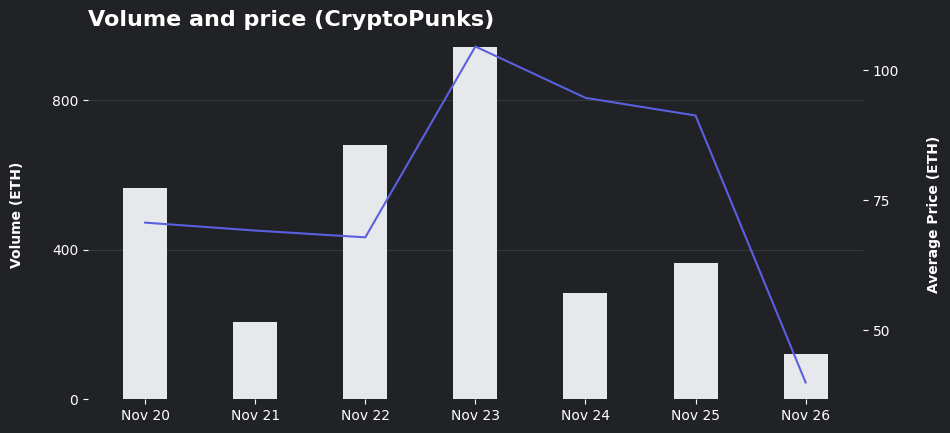

In [64]:
dates = df.Date.unique()[0:7] # select the 7 most recent days

dates = dates[::-1]

volumes = []
avgs = []

for date in dates:
    tempDf = df[df.Date == date]
    values = [int(num)/1000000000000000000 for num in tempDf['value']]
    volumes.append(np.sum(values))
    avgs.append(np.mean(values))

plt.style.use('dark_background')

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_facecolor('#202225')

ax.set_facecolor("#202225")
ax.grid(visible=True, axis="y", zorder=0, color="#36383F")
ax.bar(x=dates, height=volumes, width=0.4, zorder=3, color="#E6E8EB")
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_ylabel("Volume (ETH)", fontweight='heavy', labelpad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2 = ax.twinx()
ax2.plot(dates, avgs, color='#5B60E0')
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_ylabel("Average Price (ETH)", fontweight='heavy', labelpad=20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.title('Volume and price (CryptoPunks)', loc='left', fontsize=16, fontweight="heavy", verticalalignment="top")
plt.show() 